# Training the Penguin Model

This notebook trains and exports a model to predict penguin species based on dimensions.

## Imports

In [1]:
import pickle  # Save models

from numpy import nan  # cat's footstep
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

## Data sourcing

In [2]:
pngn = pd.read_csv('../data/penguins_size.csv')

In [3]:
pngn.sample(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
26,Adelie,Biscoe,40.6,18.6,183.0,3550.0,MALE
55,Adelie,Biscoe,41.4,18.6,191.0,3700.0,MALE


## Cleaning

In [4]:
# Simplify sex column

pngn['sex'] = pngn['sex'].replace('.', nan)

# Remove NA rows

pngn = pngn.dropna()

# Drop categorical columns

pngn = pngn.drop(['sex', 'island'], axis=1)

In [5]:
pngn.sample(3)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
325,Gentoo,46.8,16.1,215.0,5500.0
76,Adelie,40.9,16.8,191.0,3700.0
20,Adelie,37.8,18.3,174.0,3400.0


## Data splitting

In [6]:
# Get predictors/target

X = pngn.drop('species', axis=1)
y = pngn[['species']]

In [7]:
# One-hot encode predictors

X = pd.get_dummies(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=18)

## Modelling

In [9]:
model = DecisionTreeClassifier(max_depth=4,
                               random_state=18)

In [10]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=18)

## Evaluation

In [11]:
model.score(X_train, y_train)

0.9957081545064378

In [12]:
model.score(X_test, y_test)

0.94

In [13]:
y_pred = model.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        44
   Chinstrap       0.86      0.95      0.90        20
      Gentoo       1.00      0.94      0.97        36

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



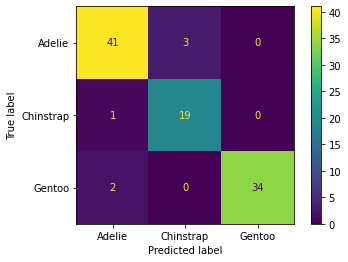

In [15]:
plot_confusion_matrix(model, X_test, y_test)

## Exporting the model